In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

%config InlineBackend.figure_format = 'svg'

FILE = '/Users/maxwellclarke/Desktop/may_2018_with_counts.pickle'

with open(FILE, 'rb') as f:
    df_pickle = pickle.load(f)
    
df = pd.DataFrame(df_pickle)

df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598847,2235829,2018-04-28 00:00:00,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598864,2235830,2018-04-28 04:00:00,Saturday,17.0,1.0,18.0
2,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598880,2235863,2018-04-28 08:00:00,Saturday,16.0,33.0,49.0
3,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6598961,2235955,2018-04-28 12:00:00,Saturday,81.0,92.0,173.0
4,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,6599175,2236015,2018-04-28 16:00:00,Saturday,214.0,60.0,274.0


## What are the most popular stations on weekends?

In [2]:
# what are the most popular stations on Weekends?

mask = ((df['WEEKDAY'] == 'Saturday') | (df['WEEKDAY'] == 'Sunday'))

df_weekend = df[mask]
df_weekend_sort = df_weekend.groupby('STATION')[['TOTAL_ACTIVITY']].sum()\
                            .sort_values('TOTAL_ACTIVITY', ascending=False)
df_weekend_sort.head(15)

,TOTAL_ACTIVITY
STATION,
34 ST-PENN STA,1196989.0
14 ST-UNION SQ,1034164.0
34 ST-HERALD SQ,1029880.0
TIMES SQ-42 ST,966955.0
42 ST-PORT AUTH,942077.0
GRD CNTRL-42 ST,811949.0
125 ST,765064.0
CANAL ST,743778.0
23 ST,716694.0


In [3]:
# what are the most popular stations on Weekends?

mask = ((df['WEEKDAY'] == 'Saturday') | (df['WEEKDAY'] == 'Sunday'))

df_weekend = df[mask]
df_weekend_sort = df_weekend.groupby('STATION')[['TOTAL_ACTIVITY']].sum()\
                            .sort_values('TOTAL_ACTIVITY', ascending=False)
df_weekend_sort.reset_index(inplace=True)
df_weekend_sort.head(15)

,STATION,TOTAL_ACTIVITY
0,34 ST-PENN STA,1196989.0
1,14 ST-UNION SQ,1034164.0
2,34 ST-HERALD SQ,1029880.0
3,TIMES SQ-42 ST,966955.0
4,42 ST-PORT AUTH,942077.0
5,GRD CNTRL-42 ST,811949.0
6,125 ST,765064.0
7,CANAL ST,743778.0
8,23 ST,716694.0
9,86 ST,684988.0


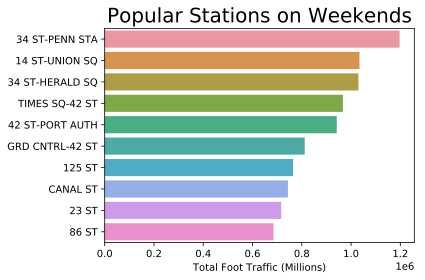

In [17]:
# plot most popular stations on weekend

sns.set_palette('cubehelix')

sns.barplot(y = 'STATION', x = 'TOTAL_ACTIVITY', data=df_weekend_sort.head(10), orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Popular Stations on Weekends', fontdict={'fontsize': 20});
plt.xlabel('Total Foot Traffic (Millions)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('presentation/figures/Most_Popular_Weekends.svg')

# What are the most popular stations on Weekdays?

In [5]:
mask = ((df['WEEKDAY'] == 'Monday')|\
       (df['WEEKDAY'] == 'Tuesday')|\
       (df['WEEKDAY'] == 'Wednesday')|\
       (df['WEEKDAY'] == 'Thursday')|\
       (df['WEEKDAY'] == 'Friday'))

df_weekday = df[mask]
df_weekday_sort = df_weekday.groupby('STATION')[['TOTAL_ACTIVITY']].sum()\
                            .sort_values('TOTAL_ACTIVITY', ascending=False)
df_weekday_sort.reset_index(inplace=True)
df_weekday_sort.head()

,STATION,TOTAL_ACTIVITY
0,34 ST-PENN STA,6309881.0
1,GRD CNTRL-42 ST,6023486.0
2,34 ST-HERALD SQ,4830378.0
3,23 ST,4324060.0
4,14 ST-UNION SQ,4007475.0


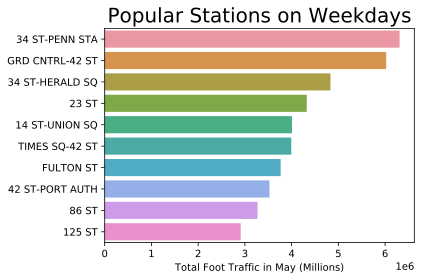

In [18]:
# plot most popular stations on weekdays
sns.barplot(y = 'STATION', x = 'TOTAL_ACTIVITY', data=df_weekday_sort.head(10), orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Popular Stations on Weekdays', fontdict={'fontsize': 20});
plt.xlabel('Total Foot Traffic in May (Millions)');
plt.ylabel('');
plt.tight_layout()
plt.savefig('presentation/figures/Most_Popular_Weekdays.svg')

In [7]:
mask = (df['WEEKDAY'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday']))

dftopdays = df[mask]
dftopdays_sort = dftopdays.groupby('STATION')[['TOTAL_ACTIVITY']].sum()\
                            .sort_values('TOTAL_ACTIVITY', ascending=False)

dftopdays_sort.reset_index(inplace=True)
dftopdays_sort.head()

,STATION,TOTAL_ACTIVITY
0,34 ST-PENN STA,5099222.0
1,GRD CNTRL-42 ST,4870308.0
2,34 ST-HERALD SQ,3927994.0
3,23 ST,3523456.0
4,TIMES SQ-42 ST,3262197.0


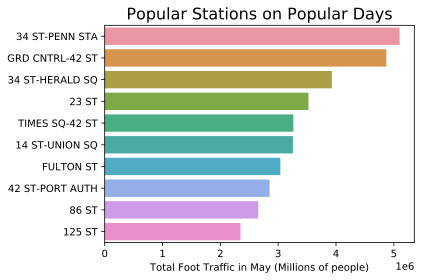

In [20]:
sns.barplot(y = 'STATION', x = 'TOTAL_ACTIVITY', data=dftopdays_sort.head(10), orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Popular Stations on Popular Days', fontdict={'fontsize': 16});
plt.xlabel('Total Foot Traffic in May (Millions of people)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('presentation/figures/Popular_Stations_Popular_Days.svg')

In [9]:
# top 3 days for each station

dftop3 = df.sort_values('TOTAL_ACTIVITY', ascending=False)
dftop3 = dftop3.groupby(['STATION', 'WEEKDAY']).sum()
dftop3 = dftop3.sort_values(['STATION', 'TOTAL_ACTIVITY'])
dftop3.head()

ENTRIES        EXITS  ENTRY_COUNTS  EXIT_COUNTS  \
STATION WEEKDAY                                                          
1 AV    Sunday     72885659770  38994716600       64335.0      72018.0   
        Saturday   72885220490  38994219411       75663.0      84160.0   
        Monday     72886052449  38995178412       83237.0      92946.0   
        Tuesday    72886576304  38995752801       89049.0      98506.0   
        Wednesday  72887121947  38996356289       92082.0     100551.0   

                   TOTAL_ACTIVITY  
STATION WEEKDAY                    
1 AV    Sunday           136353.0  
        Saturday         159823.0  
        Monday           176183.0  
        Tuesday          187555.0  
        Wednesday        192633.0

In [10]:
df.groupby(['STATION', 'DATE'])[['EXIT_COUNTS']].sum()



EXIT_COUNTS
STATION   DATE                   
1 AV      04/28/2018      18077.0
          04/29/2018      19414.0
          04/30/2018      24012.0
          05/01/2018      23274.0
          05/02/2018      24790.0
          05/03/2018      24992.0
          05/04/2018      25625.0
          05/05/2018      22583.0
          05/06/2018      18101.0
          05/07/2018      22351.0
          05/08/2018      23918.0
          05/09/2018      24544.0
          05/10/2018      25420.0
          05/11/2018      25707.0
          05/12/2018      21245.0
          05/13/2018      16158.0
          05/14/2018      23173.0
          05/15/2018      26312.0
          05/16/2018      26340.0
          05/17/2018      25325.0
          05/18/2018      26362.0
          05/19/2018      22255.0
          05/20/2018      18345.0
          05/21/2018      23410.0
          05/22/2018      25002.0
          05/23/2018      24877.0
          05/24/2018      25265.0
          05/25/2018      25023.0
103 ST    04/28/2018      10373.0
          04/29/2018      11187.0
...                           ...
YORK ST   05/24/2018       4857.0
          05/25/2018       4573.0
ZEREGA AV 04/28/2018       1160.0
          04/29/2018       1180.0
          04/30/2018       2174.0
          05/01/2018       2198.0
          05/02/2018       2553.0
          05/03/2018       2410.0
          05/04/2018       2431.0
          05/05/2018       1424.0
          05/06/2018       1149.0
          05/07/2018       2483.0
          05/08/2018       2678.0
          05/09/2018       2575.0
          05/10/2018       2610.0
          05/11/2018       2504.0
          05/12/2018       1374.0
          05/13/2018       1089.0
          05/14/2018       2475.0
          05/15/2018       2695.0
          05/16/2018       2527.0
          05/17/2018       2463.0
          05/18/2018       2498.0
          05/19/2018       1361.0
          05/20/2018       1082.0
          05/21/2018       2384.0
          05/22/2018       2652.0
          05/23/2018       2365.0
          05/24/2018       2614.0
          05/25/2018       2380.0

[10475 rows x 1 columns]

In [11]:
# top 10 station at any given time

import datetime

times = [datetime.time(i*4,0,0) for i in range(6)] # mask to filter out nonstandard times

mask = (df['DATETIME'].apply(datetime.datetime.time).isin(times))

df['TIME'] = [day.time() for day in df['DATETIME']]

dftoptime = df[mask]
df.sort_values('TIME', inplace=True)

dftoptime = dftoptime.groupby(['STATION', 'TIME']).sum().reset_index()
dftoptime

,STATION,TIME,ENTRIES,EXITS,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,1 AV,00:00:00,85034250124,45494915625,103879.0,100020.0,203899.0
1,1 AV,04:00:00,85034274261,45494933477,24137.0,17852.0,41989.0
2,1 AV,08:00:00,85034309379,45495009067,35118.0,75590.0,110708.0
3,1 AV,12:00:00,85034425602,45495154101,116223.0,145034.0,261257.0
4,1 AV,16:00:00,85034560525,45495281563,134923.0,127462.0,262385.0
5,1 AV,20:00:00,85034738159,45495467505,177634.0,185942.0,363576.0
6,103 ST-CORONA,00:00:00,1816160815,1874940961,28802.0,76891.0,105693.0
7,103 ST-CORONA,04:00:00,1816167422,1874969294,6607.0,28333.0,34940.0
8,103 ST-CORONA,08:00:00,1749952319,1807251523,168690.0,16770.0,185460.0
9,103 ST-CORONA,12:00:00,1812030424,1873710790,147997.0,35635.0,183632.0


In [12]:
# Total Ridership
df.groupby('STATION')[['ENTRY_COUNTS']].sum().sum()

ENTRY_COUNTS    145491234.0
dtype: float64

In [13]:
# plot penn by time

penn = df[df['STATION'] == '34 ST-PENN STA'].groupby(['DATETIME']).sum().reset_index()
penn.head(12)

,DATETIME,ENTRIES,EXITS,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,2018-04-28 00:00:00,1903755201,1705357947,0.0,0.0,0.0
1,2018-04-28 02:00:00,2069928408,1235271788,0.0,0.0,0.0
2,2018-04-28 04:00:00,1903757719,1705359598,2518.0,1651.0,4169.0
3,2018-04-28 06:00:00,2069928813,1235272183,405.0,395.0,800.0
4,2018-04-28 08:00:00,1903760415,1705363381,2696.0,3783.0,6479.0
5,2018-04-28 10:00:00,2069932246,1235274907,3433.0,2724.0,6157.0
6,2018-04-28 12:00:00,1903771159,1705375378,10744.0,11997.0,22741.0
7,2018-04-28 14:00:00,2002315864,1217446227,6174.0,4653.0,10827.0
8,2018-04-28 16:00:00,1903787110,1705391034,15951.0,15656.0,31607.0
9,2018-04-28 18:00:00,2069944404,1235285487,5984.0,5927.0,11911.0


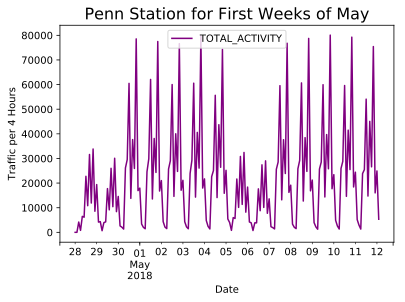

In [23]:
import matplotlib.pyplot as plt

font = {'family': 'sans',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }


penn.iloc[:170].plot(x='DATETIME', y='TOTAL_ACTIVITY', kind='line', c='purple');
plt.title('Penn Station for First Weeks of May', fontdict=font)
plt.ylabel('Traffic per 4 Hours')
plt.xlabel('Date')
plt.savefig('presentation/figures/Penn_Station_line.svg')

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

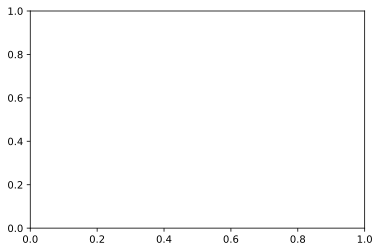

In [15]:
sns.kdeplot(penn)